## CNN Image Classification
- We are using CIFAR10 dataset
- Dataset have 60000 colour images (32x32) with 10 classes with 6000 images per class
- Classes are(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
- 50000 train and 10000 test images
- The test batch contains exactly 1000 randomly selected images from each class.
- The training batches contain the remaining images in random order, but some training batches may contain more images from class than another. Between them, the training batches contain exactly 5000 images from each class.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#### Data Loading

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train.shape # 50000 1 dimenshonal arrays

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,) # flattened y_train to an array with 50000 values(between 0 to 9)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

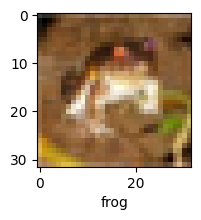

In [48]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train , 0) # frog image

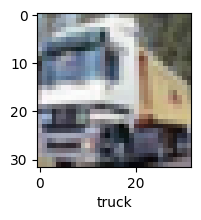

In [ ]:
plot_sample(X_train, y_train, 1) # truck image

#### Normalization
- we have rgb values ranging from 0 to 255
- we devide all with 255 to make it between 0 to 1

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#### First let's try ANN

In [ ]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid"),
])

ann.compile(optimizer="SGD",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 151s 95ms/step - loss: 1.8139 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.6243 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.5410 - accuracy: 0.4591
Epoch 4/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.4809 - accuracy: 0.4800
Epoch 5/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4318 - accuracy: 0.4979


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.4427 - accuracy: 0.4855


[1.442743182182312, 0.4855000078678131]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report :\n",classification_report(y_test, y_pred_classes))


313/313 [==============================] - 10s 31ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.46      0.52      1000
           1       0.71      0.47      0.56      1000
           2       0.39      0.35      0.37      1000
           3       0.32      0.47      0.38      1000
           4       0.38      0.49      0.43      1000
           5       0.58      0.16      0.25      1000
           6       0.55      0.53      0.54      1000
           7       0.52      0.60      0.55      1000
           8       0.49      0.76      0.60      1000
           9       0.55      0.58      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



- As we can see ANN accuracy for image classification is not very good

#### CNN MODEL
- we will keep our dense networl.
- we just add pooling and convolution layers in front of dense network

In [39]:
cnn = keras.Sequential([
    # cnn
    layers.Conv2D(input_shape=(32,32,3), filters=32, kernel_size=(3,3), activation= "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(input_shape=(32,32,3), filters=32, kernel_size=(3,3), activation= "relu"),
    layers.MaxPooling2D((2,2)),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

# Conv2D
    # filters -> we can randomly select number of filters
    # kernel_size -> shape and size of filter matrix
# MaxPooling2D
    # (2,2) -> take max value from the matrix of 2x2
# we used 2 conv and 2 pooling layers
# number of conv and pooling layers to be used can be dedfined by trial and error

In [40]:
cnn.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 41ms/step - loss: 1.5263 - accuracy: 0.4506
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1863 - accuracy: 0.5831
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0670 - accuracy: 0.6259
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9946 - accuracy: 0.6548
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9372 - accuracy: 0.6741
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8918 - accuracy: 0.6901
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8561 - accuracy: 0.7040
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8210 - accuracy: 0.7130
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7885 - accuracy: 0.7260
Epoch 10/10
1563/1563 [==============================] - 49s 31m

In [41]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9369 - accuracy: 0.6822


[0.9369142651557922, 0.682200014591217]

- As we can se te accuracy is improved in CNN
- even at 5 epochs the accuracy is around 70% as compared to ANN 5 epochs accuracy of 48%
- it will increse more if we increase the epochs
- Also the training was fast here

In [42]:
y_test = y_test.reshape(-1,) # flattened y_test to an array with 50000 values(between 0 to 9)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

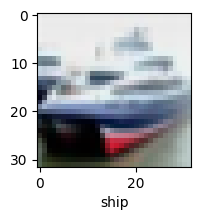

In [49]:
plot_sample(X_test, y_test, 1)

In [50]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 19ms/step


array([[1.36830388e-02, 4.78064067e-05, 1.05569944e-01, 7.88208783e-01,
        3.73644347e-04, 4.20616977e-02, 3.71473581e-02, 2.15705208e-04,
        1.26031153e-02, 8.88624782e-05],
       [5.17824516e-02, 1.64661761e-02, 2.74046033e-06, 2.96237118e-07,
        5.38399014e-09, 1.14007492e-09, 8.24922264e-09, 4.16472856e-09,
        9.31289315e-01, 4.59028961e-04],
       [2.27346092e-01, 4.51480538e-01, 4.97760437e-03, 9.58490185e-04,
        3.81388352e-04, 7.96357781e-05, 8.47014526e-05, 5.69774187e-04,
        3.10301512e-01, 3.82028148e-03],
       [7.78587639e-01, 3.29385214e-02, 6.62563229e-03, 1.14864954e-04,
        2.88262125e-03, 2.13560568e-07, 8.94643308e-05, 2.71986210e-05,
        1.78655863e-01, 7.80509363e-05],
       [3.32922682e-05, 4.45225378e-05, 2.79821339e-03, 1.96857490e-02,
        1.34340942e-01, 2.24233209e-03, 8.40788424e-01, 7.09109099e-06,
        4.56125817e-05, 1.38275891e-05]], dtype=float32)

In [57]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [58]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [59]:
print("Classification Report :\n",classification_report(y_test, y_classes))

Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.80      0.69      1000
           1       0.78      0.83      0.80      1000
           2       0.56      0.54      0.55      1000
           3       0.53      0.46      0.49      1000
           4       0.63      0.67      0.65      1000
           5       0.69      0.49      0.57      1000
           6       0.72      0.82      0.77      1000
           7       0.77      0.72      0.74      1000
           8       0.79      0.75      0.77      1000
           9       0.76      0.75      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

